In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:
N = 10
f = 0.25 * N

In [3]:
pi = sympy.Symbol('pi')
t, s = sympy.symbols('t, s')
f = sympy.exp(-t) * sympy.cos(2 * pi * f * t) * sympy.Heaviside(t)

In [4]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [8]:
L(f)

1/(2*(5.0*I*pi + s + 1)) + 1/(2*(-5.0*I*pi + s + 1))

In [43]:
fs = 1000
t = np.arange(-1, 5, 1 / fs)
f = 0.25 * N
h_t = np.exp(-t) * np.cos(2 * np.pi * f * t) * np.heaviside(t, 1)

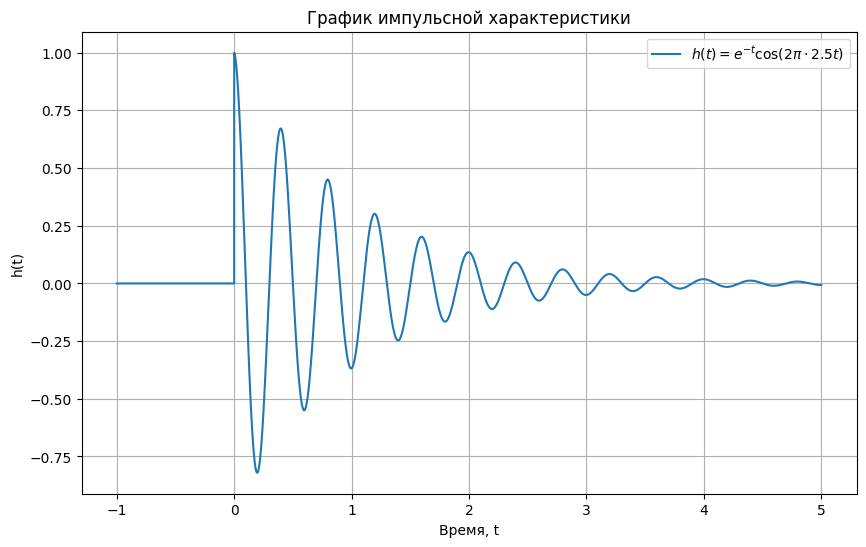

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(t, h_t, label=r'$h(t) = e^{-t} \cos(2\pi\cdot2.5t)$')
plt.title('График импульсной характеристики')
plt.xlabel('Время, t')
plt.ylabel('h(t)')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
from scipy.signal import bilinear, dlti, dimpulse

In [81]:
num_continuous = [1, 1]  # числитель
den_continuous = [1, 2, 1 + 25 * np.pi ** 2]  # знаменатель
num_discrete, den_discrete = bilinear(num_continuous, den_continuous, fs=20)
system_z = dlti(num_discrete, den_discrete)
t, h_t_impulse = dimpulse(system_z, n=100)

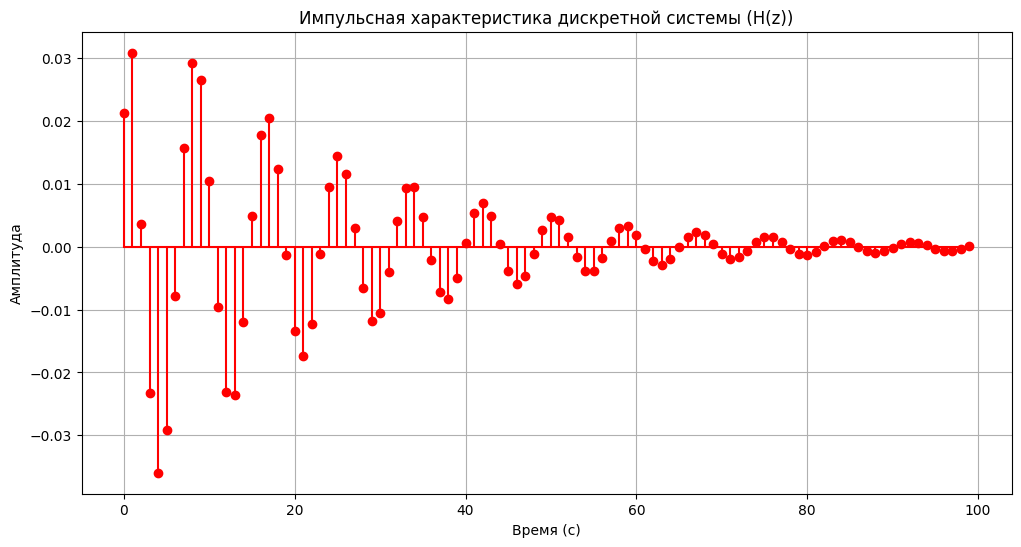

In [82]:
plt.figure(figsize=(12, 6))
plt.stem(t, np.squeeze(h_t_impulse), linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('Импульсная характеристика дискретной системы (H(z))')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

In [83]:
from scipy.signal import tf2zpk

In [84]:
z_continuous, p_continuous, _ = tf2zpk(num_continuous, den_continuous)
z_discrete, p_discrete, _ = tf2zpk(num_discrete, den_discrete)

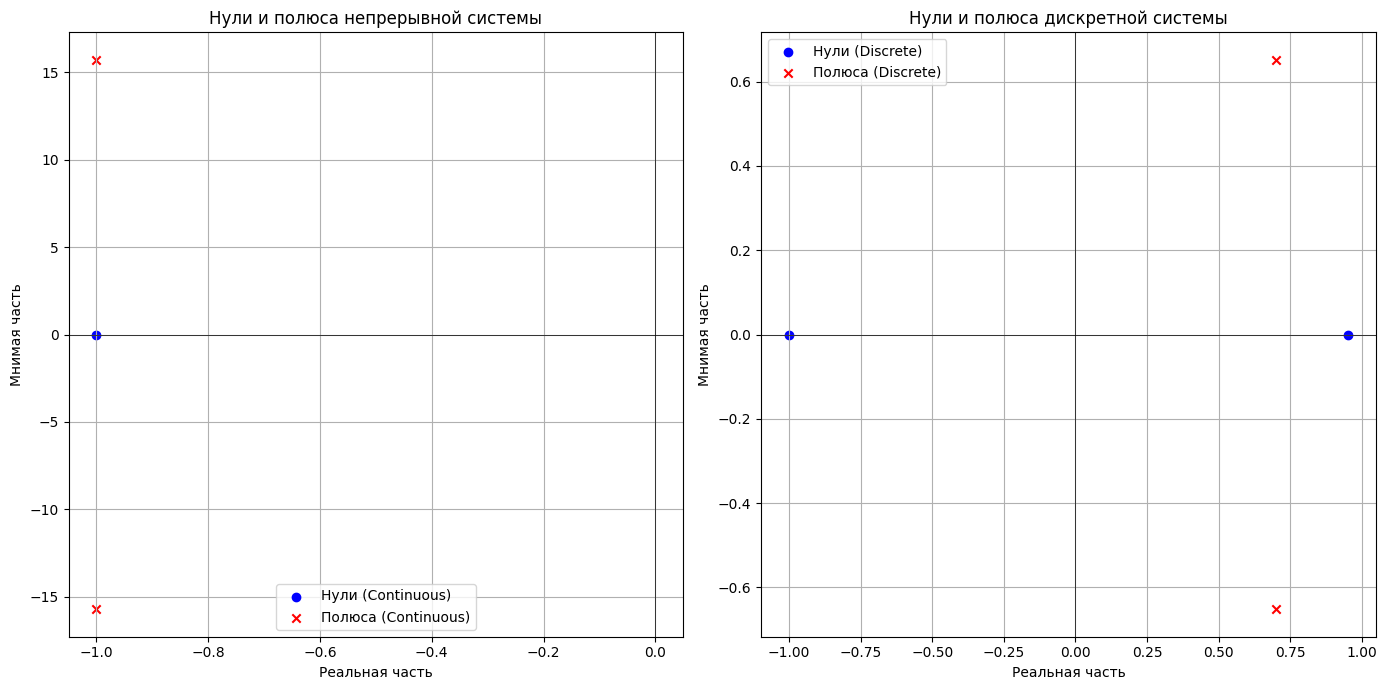

In [85]:
# Построение на комплексной плоскости
plt.figure(figsize=(14, 7))

# Непрерывная система
plt.subplot(1, 2, 1)
plt.scatter(np.real(z_continuous), np.imag(z_continuous), marker='o', color='blue', label='Нули (Continuous)')
plt.scatter(np.real(p_continuous), np.imag(p_continuous), marker='x', color='red', label='Полюса (Continuous)')
plt.title('Нули и полюса непрерывной системы')
plt.xlabel('Реальная часть')
plt.ylabel('Мнимая часть')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which='both')
plt.legend()

# Дискретная система
plt.subplot(1, 2, 2)
plt.scatter(np.real(z_discrete), np.imag(z_discrete), marker='o', color='blue', label='Нули (Discrete)')
plt.scatter(np.real(p_discrete), np.imag(p_discrete), marker='x', color='red', label='Полюса (Discrete)')
plt.title('Нули и полюса дискретной системы')
plt.xlabel('Реальная часть')
plt.ylabel('Мнимая часть')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which='both')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
from scipy.signal import freqs, freqz

In [100]:
t, h_t_discrete = freqz(num_discrete, den_discrete, worN=8000, fs=20)
omega_cont, h_t_continuous = freqs(num_continuous, den_continuous, worN=np.linspace(0, 100, 1000))

magnitude_cont = np.abs(h_t_continuous)
phase_cont = np.angle(h_t_continuous, deg=True)

magnitude_disc = np.abs(h_t_discrete)
phase_disc = np.angle(h_t_discrete, deg=True)


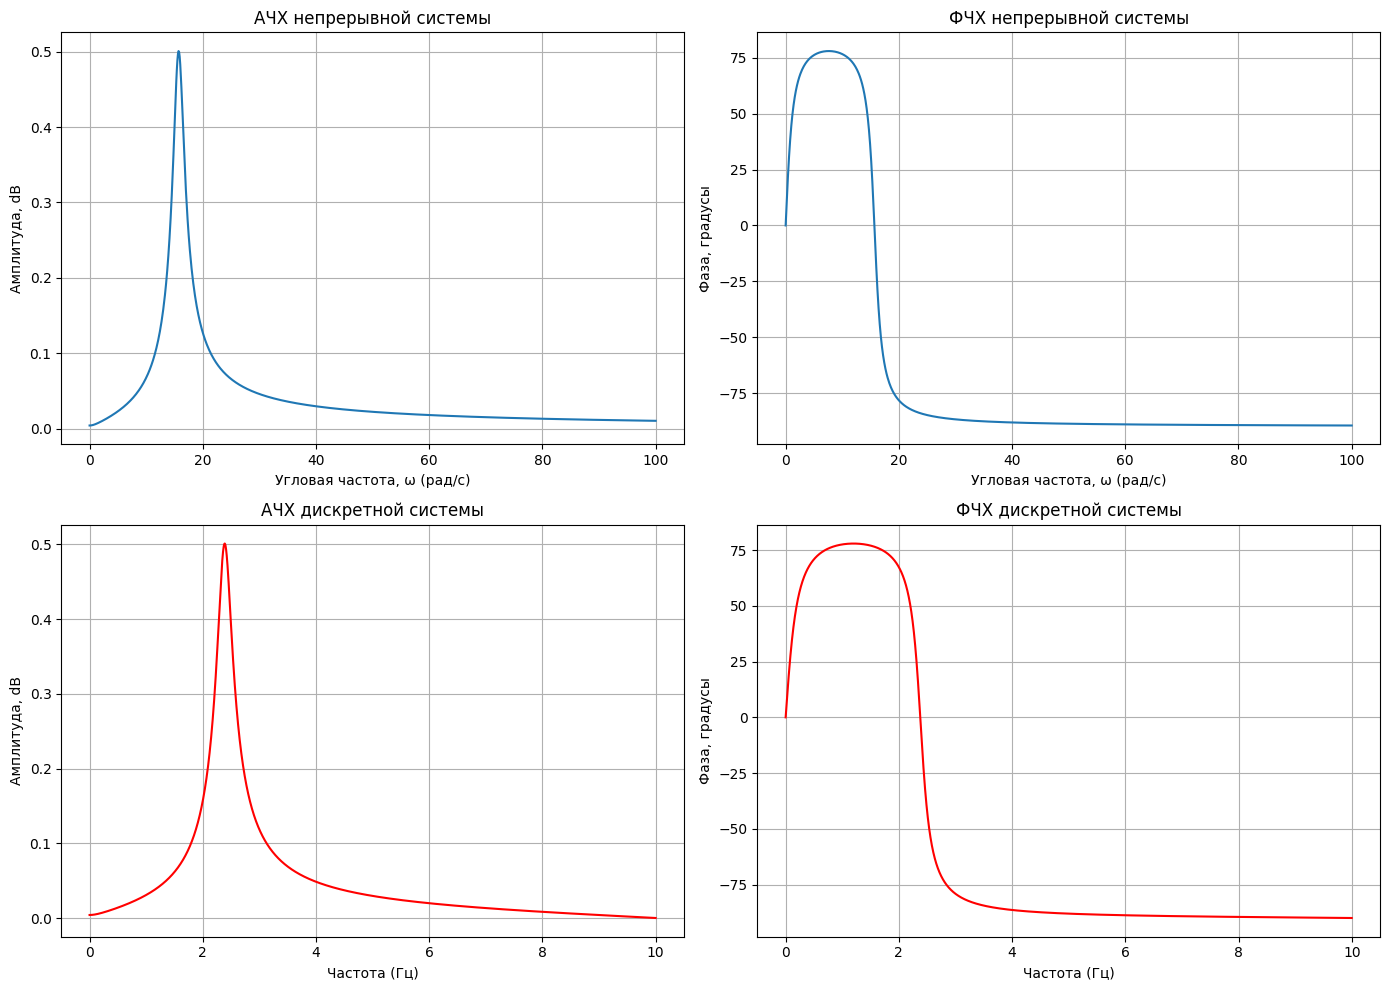

In [101]:
# Построение графиков АЧХ и ФЧХ
plt.figure(figsize=(14, 10))

# АЧХ непрерывной системы
plt.subplot(2, 2, 1)
plt.plot(omega_cont, magnitude_cont, label='Непрерывная система')
plt.title('АЧХ непрерывной системы')
plt.xlabel('Угловая частота, ω (рад/с)')
plt.ylabel('Амплитуда, dB')
plt.grid(True)

# ФЧХ непрерывной системы
plt.subplot(2, 2, 2)
plt.plot(omega_cont, phase_cont, label='Непрерывная система')
plt.title('ФЧХ непрерывной системы')
plt.xlabel('Угловая частота, ω (рад/с)')
plt.ylabel('Фаза, градусы')
plt.grid(True)

# АЧХ дискретной системы
plt.subplot(2, 2, 3)
plt.plot(t, magnitude_disc, label='Дискретная система', color='r')
plt.title('АЧХ дискретной системы')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда, dB')
plt.grid(True)

# ФЧХ дискретной системы
plt.subplot(2, 2, 4)
plt.plot(t, phase_disc, label='Дискретная система', color='r')
plt.title('ФЧХ дискретной системы')
plt.xlabel('Частота (Гц)')
plt.ylabel('Фаза, градусы')
plt.grid(True)

plt.tight_layout()
plt.show()

In [103]:
from sympy import symbols, exp, cos, pi, Heaviside

In [105]:
t, s, z = symbols('t s z')
T = symbols('T', real=True, positive=True)
f = 0.25 * N

h_t = exp(-t) * cos(2 * pi * f * t) * Heaviside(t)
H_s = L(h_t)
H_z_approx = H_s.subs(s, (z - 1) / (z + 1) * 2 / T)

H_s, H_z_approx.simplify()

(1/(2*(s + 1 + 5*I*pi)) + 1/(2*(s + 1 - 5*I*pi)),
 1/(2*(1 + 5*I*pi + 2*(z - 1)/(T*(z + 1)))) + 1/(2*(1 - 5*I*pi + 2*(z - 1)/(T*(z + 1)))))